# 02.10 Modules: Quantitative Analysis

> https://docs.openbb.co/sdk/guides/intros/quantitative-analysis

- `openbb.qa.acf` - `Plot` - Auto and Partial Correlation of Returns and Change in Returns
- `openbb.qa.bw` - `Plot` - Box and Whisker Plot
- `openbb.qa.calculate_adjusted_var` - `Risk` - Calculates VaR, adjusted for skew and kurtosis (Cornish-Fisher-Expansion)
- `openbb.qa.cdf` - `Plot` - Plots the Cumulative Distribution Function
- `openbb.qa.cusum` - `Plot` - Plots the Cumulative Sum Algorithm
- `openbb.qa.decompose` - `Plot` - Decomposition in Cyclic-Trend, Season & Residuals of Prices
- `openbb.qa.es` - `Statistics` - Expected Shortfall per percentile
- `openbb.qa.kurtosis` - `Rolling Metrics` - Rolling Kurtosis of Distribution of Prices
- `openbb.qa.line` - `Plot` - Customizable Line Plot, With Annotations
- `openbb.qa.normality` - `Statistics` - Normality Statistics and Tests
- `openbb.qa.omega` - `Risk` - Omega Ratio (Risk/Return Performance Measure)
- `openbb.qa.quantile` - `Rolling Metrics` - Rolling Median and Quantile of Prices
- `openbb.qa.qqplot` - `Plot` - QQ Plot for Data Against Normal Quantiles
- `openbb.qa.rolling` - `Rolling Metrics` - Rolling Mean and Standard Deviation of Prices
- `openbb.qa.sharpe` - `Risk` - Sharpe Ratio (Measure of Risk-Adjusted Return)
- `openbb.qa.skew` - `Rolling Metrics` - Rolling Skewness of Distribution of Prices
- `openbb.qa.spread` - `Rolling Metrics` - Rolling Variance and Standard Deviation of Prices
- `openbb.qa.so` - `Risk` - Sortino Ratio Risk Adjustment Metric
- `openbb.qa.summary` - `Statistics` - A Brief Summary of Statistics for the DataFrame
- `openbb.qa.unitroot` - `Statistics` - Normality Statistics and Tests
- `openbb.qa.var` - `Risk` - Value at Risk

In [2]:
import quandl
import pandas as pd
from openbb_terminal.sdk import openbb
from openbb_terminal import config_terminal as cfg

# %matplotlib inline (uncomment if using a Jupyter environment)

In [3]:
help(openbb.qa)

Help on Breadcrumb in module openbb_terminal.core.library.breadcrumb:

<openbb_terminal.core.library.breadcrumb.Breadcrumb object>
    QA Menu
    
    The SDK commands of the the menu:
            <openbb>.qa.cdf
            <openbb>.qa.spread
            <openbb>.qa.spread_chart
            <openbb>.qa.acf
            <openbb>.qa.es
            <openbb>.qa.es_chart
            <openbb>.qa.quantile
            <openbb>.qa.quantile_chart
            <openbb>.qa.omega
            <openbb>.qa.omega_chart
            <openbb>.qa.skew
            <openbb>.qa.skew_chart
            <openbb>.qa.kurtosis
            <openbb>.qa.kurtosis_chart
            <openbb>.qa.summary
            <openbb>.qa.summary_chart
            <openbb>.qa.rolling
            <openbb>.qa.rolling_chart
            <openbb>.qa.var
            <openbb>.qa.var_chart
            <openbb>.qa.sharpe
            <openbb>.qa.sharpe_chart
            <openbb>.qa.calculate_adjusted_var
            <openbb>.qa.sortino
       

In [4]:
# importing os module 
import os

# get environment variable API KEY 
NASDAQ_QUANDL_DATA_LINK = os.environ.get('NASDAQ_QUANDL_DATA_LINK')

# Get data from Nasdaq Data Link
shiller_pe_rdiff = quandl.get('MULTPL/SHILLER_PE_RATIO_MONTH', collapse = 'monthly', transform = 'rdiff', api_key = NASDAQ_QUANDL_DATA_LINK)
shiller_pe_rdiff.rename(columns={'Value':'P/E % Change'}, inplace = True)
shiller_pe_ratio = quandl.get('MULTPL/SHILLER_PE_RATIO_MONTH', collapse = 'monthly', api_key = NASDAQ_QUANDL_DATA_LINK)
shiller_pe_ratio.rename(columns={'Value':'P/E Ratio'}, inplace = True)

sp500_inf_adj = quandl.get('MULTPL/SP500_INFLADJ_MONTH', collapse = 'monthly', api_key = NASDAQ_QUANDL_DATA_LINK)
sp500_inf_adj.rename(columns = {'Value': 'S&P Inflation-Adjusted Value'}, inplace = True)
sp500_inf_adj_rdiff = quandl.get('MULTPL/SP500_INFLADJ_MONTH', collapse = 'monthly', transform = 'rdiff', api_key = NASDAQ_QUANDL_DATA_LINK)
sp500_inf_adj_rdiff.rename(columns = {'Value':'S&P 500 % Change'}, inplace = True)

shiller_pe = shiller_pe_ratio.join(shiller_pe_rdiff)
sp500_inf_adj = sp500_inf_adj.join(sp500_inf_adj_rdiff)

sp500_df = sp500_inf_adj.join(shiller_pe)

sp500_df

,S&P Inflation-Adjusted Value,S&P 500 % Change,P/E Ratio,P/E % Change
Date,,,,
1871-01-31,106.09,NaN,NaN,NaN
1871-02-28,104.34,-0.016495,10.92,NaN
1871-03-31,105.33,0.009488,11.19,0.024725
1871-04-30,112.35,0.066648,12.05,0.076854
1871-05-31,117.92,0.049577,12.59,0.044813
...,...,...,...,...
2022-09-30,3585.62,-0.093396,26.84,-0.094467
2022-10-31,3871.98,0.079863,28.53,0.062966
2022-11-30,4080.11,0.053753,29.90,0.048020


## Statistical Summary

In [5]:
openbb.qa.summary(sp500_df)

,S&P Inflation-Adjusted Value,S&P 500 % Change,P/E Ratio,P/E % Change
count,1825.000000,1824.000000,1824.000000,1823.000000
mean,702.937173,0.002865,17.004693,0.001363
std,842.944046,0.042523,7.078427,0.041228
min,80.550000,-0.264725,4.780000,-0.268992
10%,152.984000,-0.044699,9.310000,-0.044929
25%,204.170000,-0.017292,11.700000,-0.018396
50%,311.330000,0.005533,15.905000,0.004470
75%,782.930000,0.026003,20.562500,0.024679
90%,1918.560000,0.045094,26.477000,0.042664
max,4801.350000,0.514179,44.190000,0.511986


## Spread

In [6]:
std,variance = openbb.qa.spread(data = sp500_df['S&P 500 % Change'], window = 3)

std.rename(columns = {'STDEV_3':'Three-Month Standard Deviation'}, inplace = True)
variance.rename(columns = {'VAR_3': 'Three-Month Variance'}, inplace =True)

sp500_df = sp500_df.join([std,variance])
sp500_df.rename_axis('date', inplace = True)

sp500_df.tail(2)

,S&P Inflation-Adjusted Value,S&P 500 % Change,P/E Ratio,P/E % Change,Three-Month Standard Deviation,Three-Month Variance
date,,,,,,
2022-12-31,3912.38,-0.041109,28.65,-0.041806,0.063659,0.004052
2023-01-31,3824.14,-0.022554,27.96,-0.024084,0.050276,0.002528


## Rolling Chart

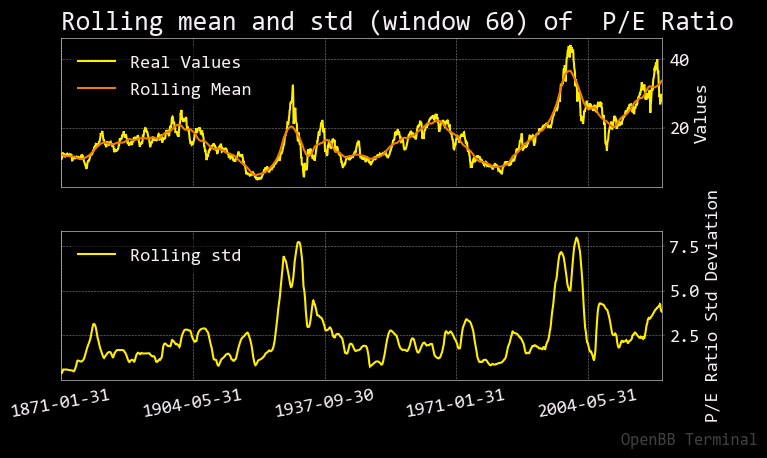

In [7]:
openbb.qa.rolling_chart(sp500_df, target = 'P/E Ratio', window = 60, symbol = '')

## Unit Root Test

> The null hypothesis is that the series contains a unit root, and the alternative is that the series is stationary.
> https://www.stata.com/features/overview/panel-data-unit-root-tests/


In [8]:
openbb.qa.unitroot(sp500_df['P/E % Change'])

,ADF,KPSS
Test Statistic,-1.071523e+01,0.340613
P-Value,3.254300e-19,0.1
NLags,2.000000e+01,2
Nobs,1.802000e+03,
ICBest,-6.497543e+03,
